# UMPC-Food101 - Image Classification

In [1]:
import torch
from torch import nn,optim
import torchvision
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt

from torchinfo import summary
import seaborn as sns
from torch_lr_finder import LRFinder
import numpy as np
from tqdm import tqdm 
import pandas as pd

from ImageModels.Dataset_food_Img import dataset
from ImageModels.Visualizations import plot_samples,plot_samples2,plot_confusion
from ImageModels.TransferModel import Model
from ImageModels.Main import main,Test_ensemble,Get_predictions

In [2]:
num_classes=101
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Dataset and Dataloaders

In [3]:
#Imagnet Weights
Train_set ,Test_set ,Trainloader, Testloader = dataset(data_dir='./datasets/Food101/images/',batch_size=128,
                                                      Transformation=True,resize=224)
#IMAGENET1K_SWAG_Weights for VIT 
Train_set ,Test_set ,Trainloader1, Testloader1 = dataset(data_dir='./datasets/Food101/images/',batch_size=128,
                                                        Transformation=True,resize=384)

### 1.1 Dataset size 

In [4]:
print ("Train_set: "+str(len(Train_set))+",  Test_set: "+str(len(Test_set)))
print(f"Total no. of batches in trainloader : {len(Trainloader)}")
print(f"Total no. of batches in testloader : {len(Testloader)}")

Train_set: 67988,  Test_set: 22716
Total no. of batches in trainloader : 532
Total no. of batches in testloader : 178


### 1.2 Classes 

In [5]:
classes=Train_set.classes
print("Classes number :",len(classes),"\n")

print("Samples of Data Classes:",classes[:10])


Classes number : 101 

Samples of Data Classes: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [6]:
import itertools
Classes_to_idx=Train_set.class_to_idx
dict(itertools.islice(Classes_to_idx.items(), 10))

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9}

### 1.3 Plot Samples of Dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


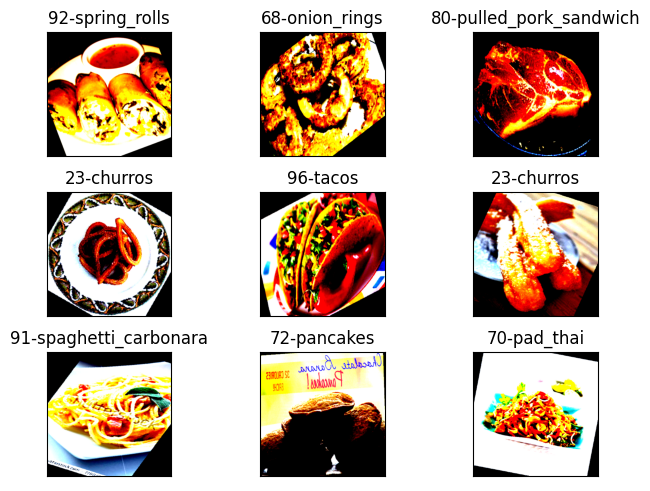

In [7]:
#print(Train_set[0][0].shape)
plot_samples(Train_set)

## 3 Loss Function and Optimizer

In [8]:
loss_fn = nn.CrossEntropyLoss()

def Get_optimizer(model,opt="SGD",lr=3e-3):
    if opt=="SGD":
        return  optim.SGD(model.parameters(), lr=lr)
    elif opt=="Adam":
        return optim.Adam(model.parameters(), lr=lr)
    elif opt=="RMSprop":
        return optim.RMSprop(model.parameters(), lr=lr)

## 4. Image Model
Vision Transformer (Vit_b_16) finetuned on **SWAG** weights. <br> 
Check this repo for Vit pretrained with and without **SWAG** weights __[food101-ImageDataset](http://github.com/MarihamR/Food101-ViT-Pytorch)__

In [9]:
model=Model("vit_b_16",num_classes=num_classes,weights="IMAGENET1K_SWAG_E2E_V1",device=device)

Using cache found in /home1/ece1/.cache/torch/hub/pytorch_vision_main


## 5. Training and Testing

In [10]:
lr=1e-3
optimizer=Get_optimizer(model,opt="RMSprop",lr=lr)

main(model,Trainloader1,Testloader1,Testloader1,loss_fn,
     optimizer,lr,name="UMPC_vit_b_16",epochs=20,save_weights=True,scheduler_bol=True,sch_step=5)

Using cache found in /home1/ece1/.cache/torch/hub/pytorch_vision_main
Ep[Train]1/20: 100%|██| 532/532 [28:59<00:00,  3.27s/it, loss=1.527, acc=0.6371]
Epoch[Test]1/20: 100%|█| 178/178 [08:57<00:00,  3.02s/it, loss=1.406, acc=0.6564
Ep[Train]2/20: 100%|██| 532/532 [28:56<00:00,  3.26s/it, loss=1.184, acc=0.7118]
Epoch[Test]2/20: 100%|█| 178/178 [08:58<00:00,  3.03s/it, loss=1.293, acc=0.6852
Ep[Train]3/20: 100%|██| 532/532 [36:01<00:00,  4.06s/it, loss=1.084, acc=0.7332]
Epoch[Test]3/20: 100%|█| 178/178 [10:34<00:00,  3.56s/it, loss=1.262, acc=0.6970
Ep[Train]4/20: 100%|██| 532/532 [55:47<00:00,  6.29s/it, loss=1.015, acc=0.7492]
Epoch[Test]4/20: 100%|█| 178/178 [14:39<00:00,  4.94s/it, loss=1.291, acc=0.6934
Ep[Train]5/20: 100%|██| 532/532 [48:00<00:00,  5.41s/it, loss=0.956, acc=0.7607]
Epoch[Test]5/20: 100%|█| 178/178 [10:36<00:00,  3.57s/it, loss=1.276, acc=0.6965
Ep[Train]6/20: 100%|██| 532/532 [47:24<00:00,  5.35s/it, loss=0.814, acc=0.7955]
Epoch[Test]6/20: 100%|█| 178/178 [10:29

KeyboardInterrupt: 

## 6. Load Best model  

In [10]:
model_best=Model("vit_b_16",num_classes=num_classes,weights="IMAGENET1K_SWAG_E2E_V1",device=device)
model_best.load_state_dict(torch.load("Saved_weights/best_weights_UMPC_vit_b_16.pt"))

Using cache found in /home1/ece1/.cache/torch/hub/pytorch_vision_main


<All keys matched successfully>

In [18]:
lr=1e-3
optimizer=Get_optimizer(model,opt="RMSprop",lr=lr)
main(model,Trainloader1,Testloader1,Testloader1,loss_fn,optimizer,lr,Test=True)

Epoch[Test]1/1: 100%|█| 178/178 [09:01<00:00,  3.04s/it, loss=1.162, acc=0.7283]


## 7. Visualize Output 
Create a small subset of testset

In [11]:
Testset_small,Testloader_small=dataset(data_dir='./datasets/Food101/images/',batch_size=128,
                                       Transformation=True,resize=384,smallset=True)

In [12]:
labels,preds=Get_predictions(model_best,Testloader_small,device="cuda")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


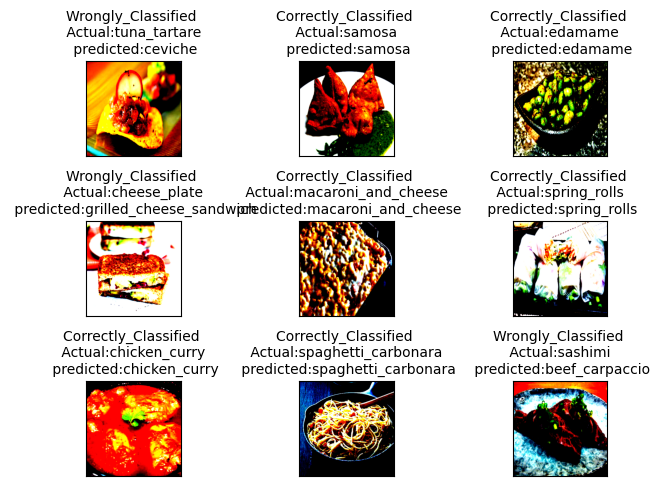

In [13]:
plot_samples2(Testset_small,preds=preds)